将许多数据处理任务表述为简洁的数组，否则需要写循环，用数组，代替循环的操作称作矢量化
矢量化数组操作运算比等价的纯python快
——广播就是针对矢量化的强大手段

In [2]:
import numpy as np

#假设我们想在一组网格类型上计算函数sqrt(x^2+y^2)
#np.meshgrid 接收两个一维数组产生两个二维矩阵  对应两个数组中的所有(x,y)对
x=np.arange(1,4)
x


array([1, 2, 3])

In [3]:
y=np.arange(4,7)
y


array([4, 5, 6])

In [4]:
xs,ys=np.meshgrid(x,y)#xs矩阵的每一行都是x的复制，ys的每一列都是y的复制
xs  

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [5]:
ys


array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [6]:
z=np.sqrt(xs**2+ys**2)
z

array([[4.12310563, 4.47213595, 5.        ],
       [5.09901951, 5.38516481, 5.83095189],
       [6.08276253, 6.32455532, 6.70820393]])

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

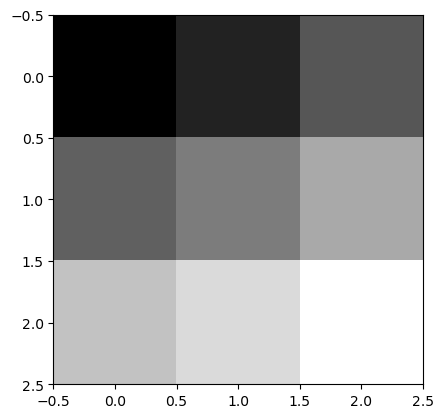

In [7]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray);
plt.colorbar

Text(0.5, 1.0, 'image')

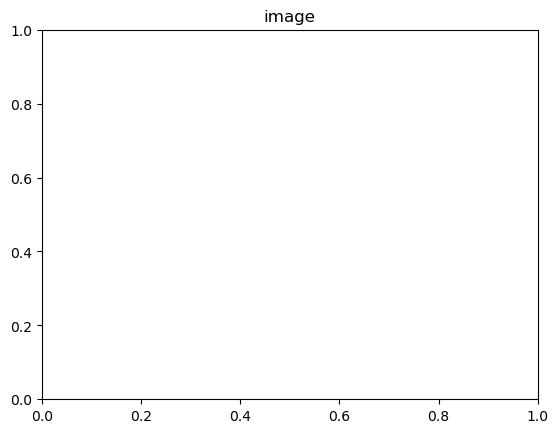

In [8]:
plt.title('image')

In [9]:
#numpy.where 函数是三元表达式  x if condition else y 的矢量化版本
xarr=np.array([1.1,1.2,1.3,1.4,1.5])   #加不加小括号是不一样的
yarr=np.array([2.1,2.2,2.3,2.4,2.5])
cond=np.array([True,False,True,True,False]) #当为True 选x中的，否则从y中选
#则，列表推导式
result=np.where(cond,xarr,yarr)#cond 是条件True选x元素，Fales 选y中元素
print(result)
        

[1.1 2.2 1.3 1.4 2.5]


用np.where可以解决，传统的列表生成器，对大数组处理速度不够快，且不能用于多维数组，但用np.where，就可以写的很快，很简洁


np.where的第二个参数和第三个参数可以不必为数组，可以上标量值
例如，有一个随机数据组成的矩阵，你希望将所有正值替换成2，所有负值替换-2  使用np.where


In [10]:
arr=np.random.randn(4,4)
arr

array([[ 3.82300184e-02, -2.71073483e-01, -7.47619916e-01,
         8.37973520e-01],
       [ 2.49928979e-01, -5.98421650e-01,  1.27069395e+00,
        -2.89078119e-01],
       [-2.31715179e-04,  5.60357293e-01,  4.83228918e-01,
         2.30617954e-01],
       [-7.84129129e-01,  9.10855527e-01, -1.92970420e+00,
        -9.82308745e-01]])

In [11]:
arr>0

array([[ True, False, False,  True],
       [ True, False,  True, False],
       [False,  True,  True,  True],
       [False,  True, False, False]])

In [12]:
np.where(arr>0,2,-2)  #判断就变的很简单了，可以不必是数组，可以是标量数字


array([[ 2, -2, -2,  2],
       [ 2, -2,  2, -2],
       [-2,  2,  2,  2],
       [-2,  2, -2, -2]])

In [13]:
np.where(arr>0,2,arr)  #不符合的就不变


array([[ 2.00000000e+00, -2.71073483e-01, -7.47619916e-01,
         2.00000000e+00],
       [ 2.00000000e+00, -5.98421650e-01,  2.00000000e+00,
        -2.89078119e-01],
       [-2.31715179e-04,  2.00000000e+00,  2.00000000e+00,
         2.00000000e+00],
       [-7.84129129e-01,  2.00000000e+00, -1.92970420e+00,
        -9.82308745e-01]])

In [14]:
#数学和统计方法函数  sum、mean、std标准差等聚合操作
arr=np.random.randn(5,4)
arr


array([[ 0.17592759, -1.3114181 , -0.31091591,  0.67950669],
       [ 1.59751346, -1.09803469, -0.10391781, -0.93514549],
       [-0.60979723, -0.56740363,  1.25152131,  0.52468948],
       [-0.17955983, -0.27586047,  0.41464289, -0.62906389],
       [-2.08525158,  0.12147368,  0.31868721,  0.26254009]])

In [15]:
arr.mean()#默认情况下，它会计算数组中所有元素的平均值。不过，你也可以通过指定 axis 参数来计算沿特定轴的平均值。

-0.13799331040687368

In [16]:
#既可以当方法，也可以当实例调用
np.mean(arr)   #上下两种方法都是可以的


-0.13799331040687368

In [17]:
arr.sum()

-2.7598662081374736

In [18]:
np.sum(arr)

-2.7598662081374736

In [19]:
#还可以接受轴
arr.mean(axis=0)  

array([-0.22023352, -0.62624864,  0.31400354, -0.01949462])

In [20]:
arr.sum(axis=1)  

array([-0.76689973, -0.53958452,  0.59900993, -0.66984129, -1.38255059])

固定的，轴0是列，轴1是行
聚合”操作是指将多个数值通过某种方式组合成一个单一的统计值，例如求和、求平均值、求最大值等。聚合操作会减少数组的维度。例如，如果你对一个二维数组进行聚合操作，结果通常是一个一维数组或一个标量值。
非聚合操作则不会减少数组的维度，而是返回一个与输入数组维度相同的数组。例如：

cumsum：计算累积和。
cumprod：计算累积积。
这些操作会返回一个中间结果组成的数组，维度与输入数组相同。


In [21]:
arr=np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [22]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [23]:
arr=np.arange(1,13).reshape((4,3))  #shape not same reshape
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [24]:
arr.cumsum(axis=0)  #列轴是，前面的所有想加到当前  而不是仅和前面这个元素想加  也是新建一


array([[ 1,  2,  3],
       [ 5,  7,  9],
       [12, 15, 18],
       [22, 26, 30]])

In [25]:
arr.cumprod(axis=1)#也是创建一个新的数组，而不是对原数据进行修改


array([[   1,    2,    6],
       [   4,   20,  120],
       [   7,   56,  504],
       [  10,  110, 1320]])

In [26]:
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

基本数组统计方法
方法
sum
对数组中全部或某轴向的元素求和。零长度的数组的sum为0。
mean
计算平均数。零长度数组的mean为NaN。
std, var
分别为标准差和方差，自由度可调（默认为n）。
min, max
最大值和最小值。
argmin, argmax
分别为最大和最小元素的索引。
表4-5：基本数组统计方法（续）
方法
cumsum
所有元素的累计算。
cumprod
所有元素的累积积。


用于布尔型数组的方法： sum，any，all等方法 会把数组里的True 计为1  所以用sum能对其布尔类型数组进行计数


In [27]:
arr=np.random.randn(100)
(arr>0).sum()


39

In [28]:
(arr>0).any()  #any用于检查 是否有一个或者多个元素为true

True

In [29]:
#all则是检查是否所有元素都是True
(arr>0).all()

False

#这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。


In [30]:
#排序 方法 sort
#原地排序或生成副本
arr=np.random.randn(5,3)
arr

array([[-0.0511932 , -1.08069349, -0.32736007],
       [-0.36234335,  0.54419878,  0.03232178],
       [-0.2866323 ,  0.34626303, -1.12579636],
       [-1.1481049 , -1.16972942,  1.01149367],
       [-0.03261661,  1.96605086, -0.05905072]])

In [31]:
arr.sort(1)  #原地排序  顺序，从小到大
arr


array([[-1.08069349, -0.32736007, -0.0511932 ],
       [-0.36234335,  0.03232178,  0.54419878],
       [-1.12579636, -0.2866323 ,  0.34626303],
       [-1.16972942, -1.1481049 ,  1.01149367],
       [-0.05905072, -0.03261661,  1.96605086]])

In [32]:
arr1=np.sort(arr,axis=0)  #产生副本
arr1   #列排序 想想列这条轴上  分布着数，然后排序   顺序---也就是升序

array([[-1.16972942, -1.1481049 , -0.0511932 ],
       [-1.12579636, -0.32736007,  0.34626303],
       [-1.08069349, -0.2866323 ,  0.54419878],
       [-0.36234335, -0.03261661,  1.01149367],
       [-0.05905072,  0.03232178,  1.96605086]])

总结：np.sort() 是顶级方法  产生一个已排序的副本。
计算分位数，最简单的方法就是对其进行排序，选特定位置的值：
如果不指定轴 np.sort()    会对最后一个轴进行排序



In [33]:
#唯一化处理，集合逻辑
names=['Bob','Joe','Will','Bob','Joe','Will','Bob','Joe','Will']
np.unique(names)#返回独立的集合


array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [34]:
#npin1d()  用于测试一个数组值在另一个数组中成员资格，返回布尔型数组
values=np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])# values 是否有[2,3,6]的元素

array([ True, False, False,  True,  True, False,  True])

unique(x)	计算x中的唯一元素，并返回有序结果
intersect1d(x, y)	计算x和y中的公共元素，并返回有序结果
union1d(x, y)	计算x和y的并集，并返回有序结果
in1d(x, y)	得到一个表示“x的元素是否包含于y”的布尔型数组
setdiff1d(x, y)	集合的差，即元素在x中且不在y中
setxor1d(x, y)	集合的对称差，即存在于于一个数组中但不存在于两个数组中的元素




NumPy 中轴的定义
轴 0 (axis=0): 沿着行方向操作，即对每一列进行操作。
轴 1 (axis=1): 沿着列方向操作，即对每一行进行操作。
常见函数及其轴操作
np.sum: 计算数组元素的和。

axis=0: 对每一列计算和。
axis=1: 对每一行计算和。
np.mean: 计算数组元素的均值。

axis=0: 对每一列计算均值。
axis=1: 对每一行计算均值。
np.max / np.min: 计算数组元素的最大值和最小值。

axis=0: 对每一列计算最大值或最小值。
axis=1: 对每一行计算最大值或最小值。
np.prod: 计算数组元素的乘积。

axis=0: 对每一列计算乘积。
axis=1: 对每一行计算乘积。
np.cumsum / np.cumprod: 计算数组元素的累积和和累积乘积。

axis=0: 对每一列计算累积和或累积乘积。
axis=1: 对每一行计算累积和或累积乘积。
np.var / np.std: 计算数组元素的方差和标准差。

axis=0: 对每一列计算方差或标准差。
axis=1: 对每一行计算方差或标准差。
np.median: 计算数组元素的中位数。

axis=0: 对每一列计算中位数。
axis=1: 对每一行计算中位数。
np.argmin / np.argmax: 计算数组元素的最小值和最大值的索引。

axis=0: 对每一列计算最小值或最大值的索引。
axis=1: 对每一行计算最小值或最大值的索引。